# IN THIS CHALLENGE WE ARE TRYING TO PREDICT A TAG FOR A GIVEN QUESTION IN STACK OVERFLOW
### THE DATA CAN BE DONWLOADED FROM HERE :
### https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
### THE TASK IS TO PREDICT AS MANY TAGS AS POSSIBLE FOR A GIVEN QUESTION WITH HIGH PRECISION AND RECALL


# Example Data point
Title:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
Body : 

        #include<
        iostream>\n
        #include<
        stdlib.h>\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout<<"Enter the number of variables";\n         cin>>n;\n\n         
                 cout<<"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y<n+1; y++)\n         
                 {\n                 
                    cin>>m[y];\n                 
                    cin>>u[y];\n         
                 }\n         
                 for(x=1; x<n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1<n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i<n+1; i++)\n         
                 {\n            
                    for(int l=1; l<=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout<<a[l]<<"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j<4; j++)\n            
                    {\n                
                        cout<<e[i][j];\n                
                        for(int k=0; k<n-(i+1); k++)\n                
                        {\n                    
                            cout<<a[k]<<"\\t";\n               
                        }\n                
                        cout<<"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        
\n\n
        
The answer should come in the form of a table like
\n\n
        
       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        
\n\n
        
if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)
\n\n
        
The output is not coming,can anyone correct the code or tell me what\'s wrong?
\n'
Tags : 'c++ c'

In [209]:
### importing required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3, csv,re,os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sqlalchemy import create_engine
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer , SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from datetime import datetime



In [210]:
### read data from csv and create a SQL database 
if not os.path.isfile('train.db'):
    start = dt.datetime.now()
    engine = create_engine('sqlite:///train.db')
    chunksize = 180000
    j = 0
    idx =1
    for df in pd.read_csv("Train.csv", names = ['id', 'Title', 'Body', 'Tags'], chunksize = chunksize, iterator = True,encoding = 'utf-8'):
        df.index += idx
        j+=1
        df.to_sql('data', engine, if_exists='append')
        idx = df.index[-1]+1
    print("time taken to run this cell:", datetime.now()-start)
    


In [211]:
### count no.of rows in database created
if os.path.isfile('train.db'):
    start = datetime.now()
    connection = sqlite3.connect('train.db')
    count_records = pd.read_sql_query("""select count(*) from data""", connection)
    connection.close()
    print('no.of rows', count_records['count(*)'].values[0])
    print('time taken to run the query', datetime.now()-start)
else:
    print('please generate train.db file')

no.of rows 6034196
time taken to run the query 0:00:02.621899


In [3]:
### check for duplicates
if os.path.isfile('train.db'):
    start = datetime.now()
    connect = sqlite3.connect('train.db')
    dup_records_df = pd.read_sql_query('select Title , Body , Tags, count(*) as dup_count from data group by Title, Body,Tags', connect)
    connect.close()
    print("time taken to run:", datetime.now()-start)
else:
    print('no such db file exists')
    
    

time taken to run: 0:07:57.468194


In [212]:
dup_records_df.head()


,Title,Body,Tags,dup_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


In [213]:
print("number of duplicate questions :",
      count_records['count(*)'].values[0]- dup_records_df.shape[0], "(",(1-((dup_records_df.shape[0])/(count_records['count(*)'].values[0])))*100,"% )")

number of duplicate questions : 1827881 ( 30.292038906260256 % )


In [214]:
dup_records_df.dup_count.value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: dup_count, dtype: int64

In [217]:
### convert none tyoe to empty strings
mask = dup_records_df.applymap(lambda x: x is None)
cols = dup_records_df.columns[(mask).any()]
for col in dup_records_df[cols]:
    dup_records_df.loc[mask[col], col] = ''

In [218]:
start = datetime.now()
dup_records_df["tag_count"] = dup_records_df["Tags"].apply(lambda text: len(text.split(" ")))
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
dup_records_df.head()

Time taken to run this cell : 0:00:05.621737


,Title,Body,Tags,dup_count,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


In [220]:
dup_records_df.tag_count.value_counts()


3    1206157
2    1111706
4     814996
1     568298
5     505158
Name: tag_count, dtype: int64

In [221]:
#### create a new database with no duplicate records
if not os.path.isfile('no_dup_train.db'):
    eng = create_engine("sqlite:///no_dup_train.db")
    no_dup = pd.DataFrame(dup_records_df, columns = ['Title','Body','Tags'])
    no_dup.to_sql('train_no_dup', eng)
    



In [222]:
### create a connection to access the database file
if os.path.isfile('no_dup_train.db'):
    start = datetime.now()
    conn = sqlite3.connect('no_dup_train.db')
    tags = pd.read_sql_query("""select Tags from train_no_dup""", conn)
    conn.close()
    ## drop columns which are not required
    tags.drop(tags.index[0], inplace = True)
    tags.head()
    

In [223]:
tags.to_csv('tags.csv')

In [224]:
tags.head()

,Tags
1,c# silverlight data-binding
2,c# silverlight data-binding columns
3,jsp jstl
4,java jdbc
5,facebook api facebook-php-sdk


In [225]:
tags.shape

(4206314, 1)

In [226]:
### convert none tyoe to empty strings
mask = tags.applymap(lambda x: x is None)
cols = tags.columns[(mask).any()]
for col in tags[cols]:
    tags.loc[mask[col], col] = ''
    



In [227]:
### ANALYSIS OF TAGS

### vectorize the tags

vectorizer = CountVectorizer(tokenizer= lambda x:x.split())


tag_vec = vectorizer.fit_transform(tags['Tags'])




In [229]:
print("Number of unique tags :", tag_vec.shape[1])
print("Number of data points :", tag_vec.shape[0])


Number of unique tags : 42048
Number of data points : 4206314


In [230]:
tags_data = vectorizer.get_feature_names()
print("Some of the tags we have :", tags_data[:10])


Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


In [231]:
### num of tags that occured once

freq = tag_vec.sum(axis=0).A1
result = dict(zip(tags_data, freq))


In [232]:
tag_df = pd.DataFrame.from_dict(result, orient = 'index')
tag_df.head()

,0
.a,18
.app,37
.asp.net-mvc,1
.aspxauth,21
.bash-profile,138


In [233]:
tag_df.to_csv('tags.csv')

In [234]:
tags_df = pd.read_csv('tags.csv', names = ['tags', 'counts'])
tags_df = tags_df.drop(tags_df.index[0])

tags_df.head()

,tags,counts
1,.a,18
2,.app,37
3,.asp.net-mvc,1
4,.aspxauth,21
5,.bash-profile,138


In [235]:
tag_df_sorted = tags_df.sort_values(['counts'], ascending = False)
tag_count = tags_df['counts'].values

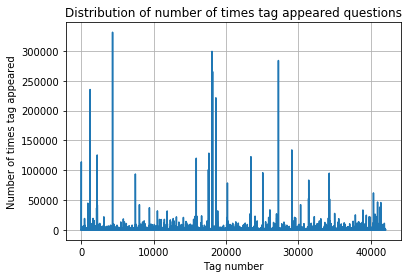

In [236]:
plt.plot(tag_count)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

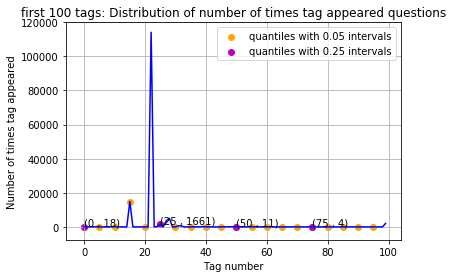

20 [   18    53   184 14884     2  1661     6     1    15     3    11    27
     3    11     3     4     3    22     1    20]


In [237]:
plt.plot(tag_count[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_count[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_count[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_count[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_count[0:100:5]), tag_count[0:100:5])

In [238]:
## store tags greater than 10k in list
tags_10k = tags_df[tags_df.counts>10000].tags
## store tags greater than 100k in list
tags_100k = tags_df[tags_df.counts>100000].tags
print ('{} Tags are used more than 10000 times'.format(len(tags_10k)))
print ('{} Tags are used more than 100000 times'.format(len(tags_100k)))



153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


In [239]:
## tags per question

tag_ques_count = tag_vec.sum(axis=1).tolist()

tag_ques_count = [int(j) for i in tag_ques_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_ques_count)))


We have total 4206314 datapoints.


In [241]:
print( "Maximum number of tags per question: %d"%max(tag_ques_count))
print( "Minimum number of tags per question: %d"%min(tag_ques_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_ques_count)*1.0)/len(tag_ques_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 0
Avg. number of tags per question: 2.899438


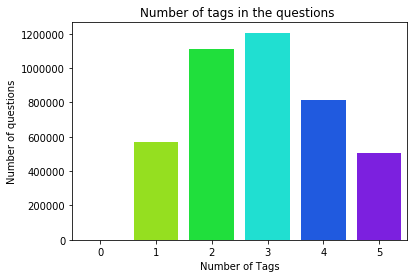

In [243]:
import seaborn as sns
sns.countplot(tag_ques_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

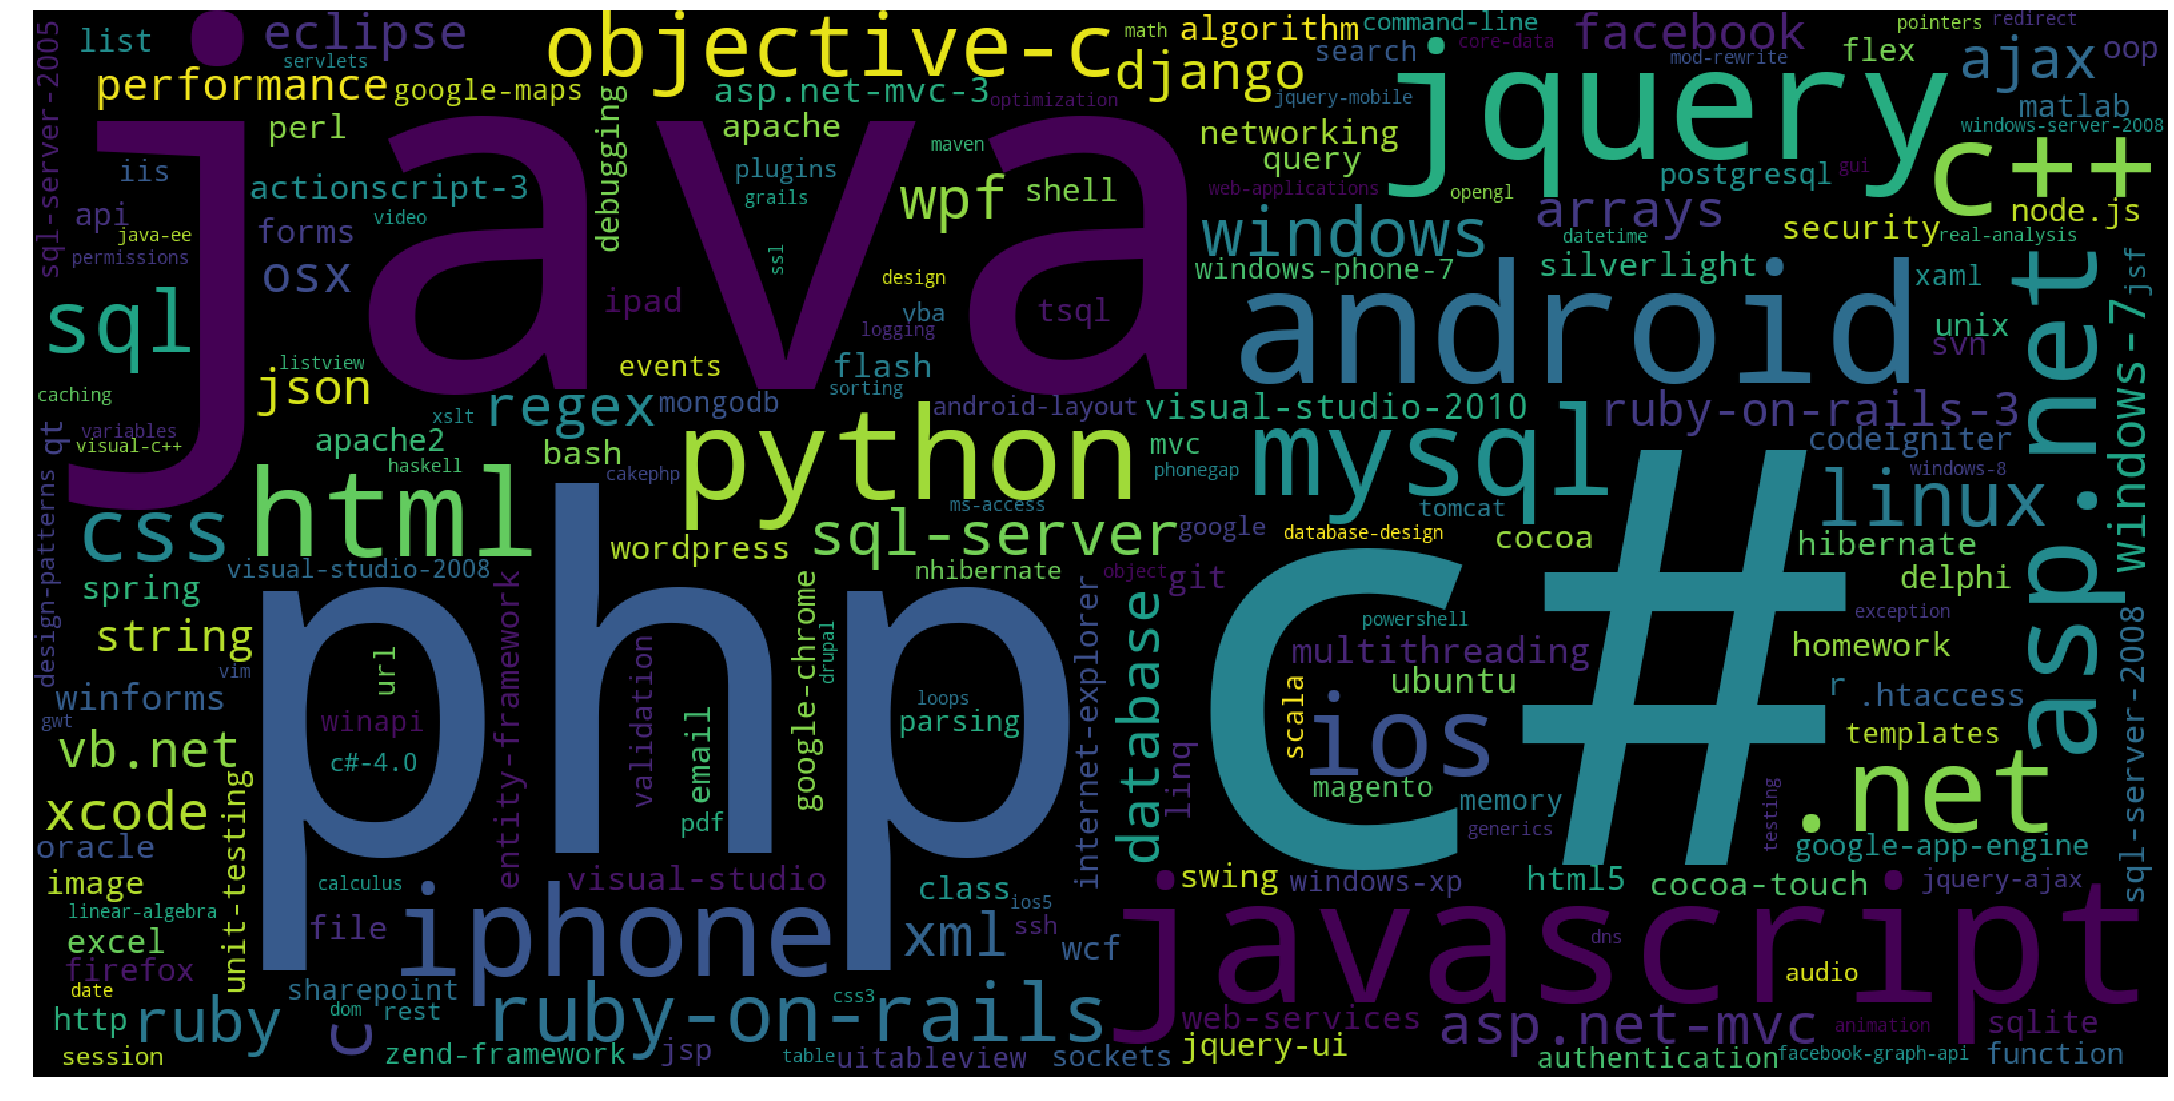

In [144]:
###  most frequent tags

# Ploting word cloud
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()


# Observations:A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

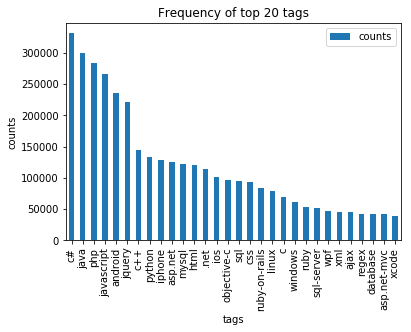

In [147]:
import numpy as np
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['tags'])
plt.xlabel('tags')
plt.ylabel('counts')
plt.show()

In [257]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean,' ', str(text))
    return clean_text
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [276]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()



    

In [277]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [279]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

read_db = 'no_dup_train.db'
write_db= 'Titlemoreweight.db'
train_size = 400000
if os.path.isfile(read_db):
    con_r = create_connection(read_db)
    if con_r is not None:
        reader = con_r.cursor()
        reader.execute("select Title, Body, Tags from train_no_dup limit 500001;")
        
if os.path.isfile(write_db):
    con_w = create_connection(write_db)
    if con_w is not None:
        tables = table_exists(con_w)
        writer = con_w.cursor()
        if tables != 0:
            writer.execute("delete from QuestionsProcessed where 1")
            print("clear all rows")



clear all rows


## Preprocessing of data

# Sample 0.5M data points
# Separate out code-snippets from Body
# Remove Spcial characters from Question title and description (not in code)
# Remove stop words (Except 'C')
# Remove HTML Tags
# Convert all the characters into small letters
# Use SnowballStemmer to stem the words

In [280]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

start = datetime.now()
preprocessed_data = []
read.fetchone()
ques_with_code, ques_processed = 0 ,0
len_pre, len_post = 0,0

for row in reader:
    is_code=0
    title, question, tags = row[0], row[1], str(row[2])
    if '<codde>' in question:
        ques_with_code +=1
        is_code=1
    x = len(question)+len(title)
    len_pre+=x
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=remove_html_tags(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    ques_processed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (ques_processed%100000==0):
        print("number of questions completed=",ques_processed)

no_dup_avg_len_pre=(len_pre*1.0)/ques_processed
no_dup_avg_len_post=(len_post*1.0)/ques_processed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((ques_with_code*100.0)/ques_processed))

print("Time taken to run this cell :", datetime.now() - start)
    



number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
number of questions completed= 500000
Avg. length of questions(Title+Body) before processing: 1239
Avg. length of questions(Title+Body) after processing: 424
Percent of questions containing code: 0
Time taken to run this cell : 0:22:43.417206


In [281]:
# never forget to close the conections or else we will end up with database locks
con_r.commit()
con_w.commit()
con_r.close()
con_w.close()

# Sample quesitons after preprocessing of data

In [282]:
if os.path.isfile(write_db):
    con_r = create_connection(write_db)
    if con_r is not None:
        read =con_r.cursor()
        read.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        read.fetchone()
        for row in read:
            print(row)
            print('-'*100)
con_r.commit()
con_r.close()

Questions after preprocessed
('dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem bind correct grid come column form come grid column although necessari bind nthank repli advance..',)
----------------------------------------------------------------------------------------------------
('dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem bind correct grid come column form come grid column although necessari bind nthank repli advance..',)
----------------------------------------------------------------------------------------------------
('java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid follow guid link instal jstl got fo

In [283]:
## save to database
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    con_r = create_connection(write_db)
    if con_r is not None:
        preprocessed_data = pd.read_sql_query("""select question, Tags from QuestionsProcessed""", con_r)
con_r.commit()
con_r.close()


In [284]:
preprocessed_data.head()

,question,tags
0,implement boundari valu analysi softwar test c...,c++ c
1,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding
2,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
3,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
4,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc


In [285]:
print("number of data points in sample :", preprocessed_data.shape[0])


number of data points in sample : 500001


In [286]:
# Converting string Tags to multilable output variables
vector = CountVectorizer(tokenizer= lambda x: x.split(), binary=True)
multilabel_y = vector.fit_transform(preprocessed_data['tags'])

In [287]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [288]:
#Selecting 500 Tags
quest_explained = []
total_tags = multilabel_y.shape[1]
total_quest = preprocessed_data.shape[0]
for i in range(500, total_tags,100):
    quest_explained.append(np.round(((total_quest-questions_explained_fn(i))/total_quest)*100,3))
    



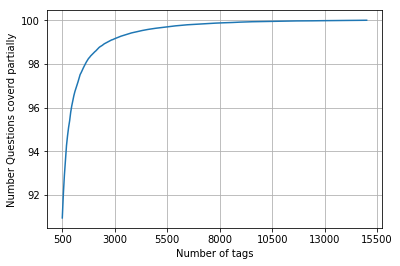

with  5500 tags we are covering  99.157 % of questions
with  500 tags we are covering  90.956 % of questions


In [289]:
fig, ax = plt.subplots()
ax.plot(quest_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",quest_explained[50],"% of questions")
print("with ",500,"tags we are covering ",quest_explained[0],"% of questions")

In [290]:
# we will cpnsider 500 tags for modelling
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_quest)


number of questions that are not covered : 45221 out of  500001


In [291]:
x_train = preprocessed_data.head(train_size)
x_test = preprocessed_data.tail(preprocessed_data.shape[0]-400000)

y_train = multilabel_yx[0:train_size, :]
y_test = multilabel_yx[train_size:preprocessed_data.shape[0],:]


In [292]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (400000, 500)
Number of data points in test data : (100001, 500)


In [296]:
#Featurizing data with TfIdf vectorizer
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)



Time taken to run this cell : 0:06:08.366266


In [297]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (400000, 94927) Y : (400000, 500)
Dimensions of test data X: (100001, 94927) Y: (100001, 500)


In [301]:
## One VS Rest SGD classifier
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict (x_test_multilabel)




NameError: name 'metrics' is not defined

In [303]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (classification_report(y_test, predictions))


Accuracy : 0.23649763502364976
Hamming loss  0.002782592174078259
Micro-average quality numbers
Precision: 0.7208, Recall: 0.3257, F1-measure: 0.4486
Macro-average quality numbers
Precision: 0.5464, Recall: 0.2576, F1-measure: 0.3344


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: 

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      5519
           1       0.68      0.26      0.38      8190
           2       0.81      0.38      0.52      6529
           3       0.82      0.43      0.56      3231
           4       0.81      0.41      0.54      6430
           5       0.82      0.34      0.48      2879
           6       0.87      0.49      0.63      5086
           7       0.88      0.54      0.67      4533
           8       0.60      0.13      0.22      3000
           9       0.81      0.52      0.64      2765
          10       0.59      0.16      0.25      3051
          11       0.70      0.33      0.45      3009
          12       0.65      0.24      0.35      2630
          13       0.71      0.23      0.35      1426
          14       0.90      0.53      0.67      2548
          15       0.67      0.18      0.28      2371
          16       0.64      0.23      0.34       873
          17       0.89    

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [304]:
import joblib
joblib.dump(classifier, 'lr_with_more_title_weight.pkl') 


['lr_with_more_title_weight.pkl']

In [305]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))


precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.